# Customer Segmentation

# 

Importing the dependencies                               

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# 

Data collection and analysis

In [28]:
#loading the data from csv file to a pandas dataframe
customer_data = pd.read_csv('/Users/HRITICK.A/Mall_Customers.csv')

In [29]:
#first five rows in the dataframe
#head function will print the first 5 rows of the data frame
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
#find how many rows and columns we have in "customer_data" dataframe
#we will be using shape function to get the values of the latter
customer_data.shape

(200, 5)

In [31]:
#getting some information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [32]:
#we can get more information about the missing datas
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [33]:
# We need to choose which column we would need for clustering.
# We don't need customer id because we are going to cluster based on their spending behaviour
# We can take gender as well as age into consideration but for simplicity we need just the annual income and the spending score
# Choosing the annual income column and spending score column

In [34]:
# Storing the values of two columns in 'X'
X = customer_data.iloc[:,[3,4]].values

In [35]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# 

Choosing the correct number of clusters

WCSS = = > Within Clusters Sum of Squares

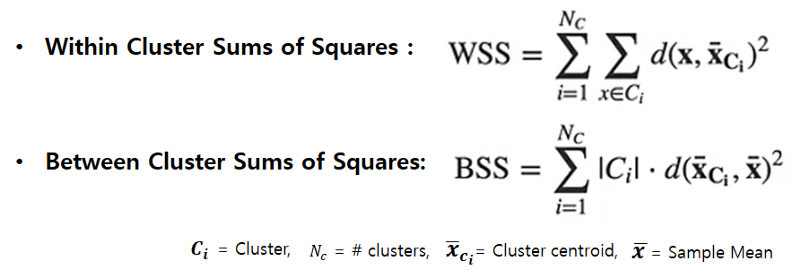

In [36]:
#FINDING THE WCSS VALUE FOR DIFFERENT NUMBER OF CLUSTERS
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

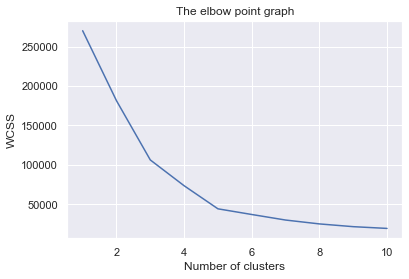

In [37]:
#plot an elbow graph to check which wcss value has low value
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The elbow point graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

# 

Training the k-Means Clustering model

k : Number of clusters we are taking here it is 5

In [38]:
kmeans = KMeans(n_clusters = 5 , init = 'k-means++' , random_state = 0)

Y = kmeans.fit_predict(X)
print(Y)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


# 

Visualizing all the clusters

# 5 clusters : 0 1 2 3 4

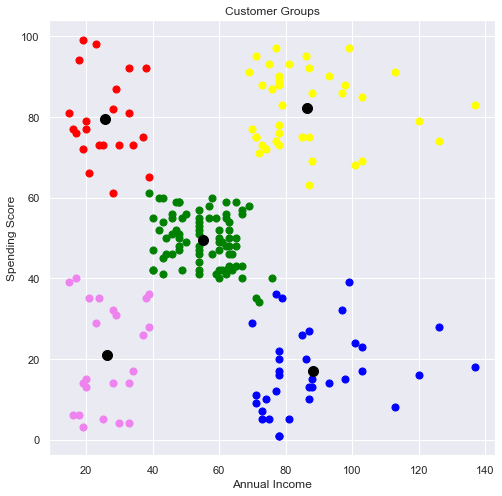

In [39]:
#plotting all the clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster5')
#plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()